# Natural Language Processing in tf

#### Tokenizer

`Tokens` - numerical representation of words

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [4]:
sentences=['I love my dog.','i love my cat','You love my dog!']

In [7]:
tokenizer=Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)

In [8]:
word_index=tokenizer.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

#### Sequences

In [9]:
sentences=['I love my dog.','i love my cat','You love my dog!','Do you think my dog is amazing?']

In [21]:
tokenizer=Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)

In [22]:
word_index=tokenizer.word_index
word_index

{'my': 1,
 'love': 2,
 'dog': 3,
 'i': 4,
 'you': 5,
 'cat': 6,
 'do': 7,
 'think': 8,
 'is': 9,
 'amazing': 10}

In [23]:
sequences=tokenizer.texts_to_sequences(sentences)
sequences

[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]

#### Out Of Vocabulary words (OOV)

If a word is not present in the vocabulary it will not be added in the sequence

In [24]:
test_data=['I really like dog and cats']
tokenizer.texts_to_sequences(test_data)

[[4, 3]]

In [25]:
sentences=['I love my dog.','i love my cat','You love my dog!','Do you think my dog is amazing?']

In [26]:
tokenizer=Tokenizer(num_words=100,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [28]:
word_index=tokenizer.word_index
word_index

{'<OOV>': 1,
 'my': 2,
 'love': 3,
 'dog': 4,
 'i': 5,
 'you': 6,
 'cat': 7,
 'do': 8,
 'think': 9,
 'is': 10,
 'amazing': 11}

In [30]:
test_data=['I really like dog and cats']
sequences=tokenizer.texts_to_sequences(test_data)
sequences

[[5, 1, 1, 4, 1, 1]]

#### Padding

In [34]:
sequences=tokenizer.texts_to_sequences(sentences)
sequences

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [35]:
padded=pad_sequences(sequences)
padded

array([[ 0,  0,  0,  5,  3,  2,  4],
       [ 0,  0,  0,  5,  3,  2,  7],
       [ 0,  0,  0,  6,  3,  2,  4],
       [ 8,  6,  9,  2,  4, 10, 11]])

In [37]:
padded=pad_sequences(sequences,padding='post',truncating='post',maxlen=6)
padded

array([[ 5,  3,  2,  4,  0,  0],
       [ 5,  3,  2,  7,  0,  0],
       [ 6,  3,  2,  4,  0,  0],
       [ 8,  6,  9,  2,  4, 10]])

##### Sarcasm data

In [39]:
#https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [41]:
with open('sarcasm_text.json','r') as f:
    data=json.load(f)

In [42]:
data[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [43]:
sentences=[]
labels=[]
urls=[]
for text in data:
    sentences.append(text['headline'])
    labels.append(text['is_sarcastic'])
    urls.append(text['article_link'])

In [45]:
tokenizer=Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

In [46]:
sequences=tokenizer.texts_to_sequences(sentences)
padded=pad_sequences(sequences,padding='post')

In [47]:
print(sequences[0])
print(padded[0])

[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


---

## Word Embeddings

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import io

C:\Users\pk764\miniconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Data

In [2]:
imdb,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [3]:
train,test=imdb['train'],imdb['test']

In [4]:
train_sentences=[]
train_labels=[]
for s,l in train:
    train_sentences.append(s.numpy().decode('utf8'))
    train_labels.append(l.numpy())

test_sentences=[]
test_labels=[]
for s,l in test:
    test_sentences.append(s.numpy().decode('utf8'))
    test_labels.append(l.numpy())

train_labels_final=np.array(train_labels)
test_labels_final=np.array(test_labels)

In [75]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [6]:
train_labels[0]

0

In [25]:
vocab_size=10000
max_length=120
embedding_dim=16
trunc_type='post'
oov_tok="<OOV>"

In [61]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences,maxlen=120,truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=120,truncating='post')

In [23]:
word_index['this']

12

In [20]:
print(*sequences[0])

12 14 33 425 392 18 90 28 1 9 32 1366 3585 40 486 1 197 24 85 154 19 12 213 329 28 66 247 215 9 477 58 66 85 114 98 22 5675 12 1322 643 767 12 18 7 33 400 8170 176 2455 416 2 89 1231 137 69 146 52 2 1 7577 69 229 66 2933 16 1 2904 1 1 1479 4940 3 39 3900 117 1584 17 3585 14 162 19 4 1231 917 7917 9 4 18 13 14 4139 5 99 145 1214 11 242 683 13 48 24 100 38 12 7181 5515 38 1366 1 50 401 11 98 1197 867 141 10


In [18]:
len(train_sentences[0].split(' '))

116

In [13]:
padded[0]

array([   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
          1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
        154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
         58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
         12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
       1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
       2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
        117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
          9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
        242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
       1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10])

#### Model

`Embedding layer` - transforms the words into vectors (embeddings) by 'learning process'

In [27]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=120),
    # tf.keras.layers.GlobalAveragePooling1D()  - can be instead of Flatten to speed up the training
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(padded, train_labels_final, epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 0.4785 - accuracy: 0.7544 - val_loss: 0.3825 - val_accuracy: 0.8276
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2371 - accuracy: 0.9090 - val_loss: 0.4125 - val_accuracy: 0.8188
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0944 - accuracy: 0.9751 - val_loss: 0.5062 - val_accuracy: 0.8042
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0235 - accuracy: 0.9973 - val_loss: 0.5912 - val_accuracy: 0.8092
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.6674 - val_accuracy: 0.8084
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7312 - val_accuracy: 0.8084
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 8.6153e-04 - accuracy: 1.0000 - val_loss: 0.7813 - val_accuracy: 0.8084
Ep

In [29]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights.shape) 

(10000, 16)


In [36]:
reverse_word_index = tokenizer.index_word

### Ebdedding for word 'this'

In [41]:
word_index['this']

12

In [40]:
reverse_word_index[12]

'this'

In [33]:
embedding_layer.get_weights()[0][12]

array([ 0.01732098,  0.03883694,  0.00314773,  0.07088259, -0.01046987,
       -0.06574874,  0.00452995, -0.07446088, -0.03176188,  0.0255941 ,
        0.04540478,  0.02921965, -0.10129014, -0.06795222,  0.04545994,
       -0.02090956], dtype=float32)

#### saving embedding to files

In [48]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word_name = reverse_word_index[word_num]
  word_embedding = embedding_weights[word_num]
  out_m.write(word_name + "\n")
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

out_v.close()
out_m.close()

#### Prediction

In [88]:
sentence=['I am very sad and disappointed.']
sequence=tokenizer.texts_to_sequences(sentence)
padded_sentence=pad_sequences(sequence,maxlen=120,truncating='post')

In [93]:
model.predict(padded_sentence)

array([[0.01014504]], dtype=float32)

In [100]:
sentence=['I am very happy and positive.']
sequence=tokenizer.texts_to_sequences(sentence)
padded_sentence=pad_sequences(sequence,maxlen=120,truncating='post')

In [101]:
model.predict(padded_sentence)

array([[0.07908636]], dtype=float32)

#### embedding representation of the sentence

In [105]:
sentence=['I am very sad and disappointed.']
sequence=tokenizer.texts_to_sequences(sentence)
padded_sentence=pad_sequences(sequence,maxlen=120,truncating='post')

In [106]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]

In [104]:
sequence[0]

[11, 242, 53, 617, 3, 683]

In [107]:
[embedding_weights[i] for i in sequence[0] ]

[array([ 0.05546806,  0.02298771,  0.0172684 ,  0.03091698, -0.07459392,
         0.01433226,  0.02187289,  0.00327258, -0.00966344,  0.02315352,
        -0.03263053, -0.03765973, -0.06803975, -0.09124558,  0.04811637,
        -0.08203588], dtype=float32),
 array([-0.05712991,  0.01696622, -0.14221789,  0.03213404, -0.05724561,
        -0.01006129, -0.00514991,  0.06566341, -0.21159425,  0.0419423 ,
        -0.09126277,  0.11824071, -0.06019272,  0.00994538,  0.08418934,
        -0.06620424], dtype=float32),
 array([ 0.03498159,  0.03117444,  0.0812915 , -0.01013181,  0.02452705,
        -0.00558887,  0.06784967, -0.03621948,  0.04363375,  0.01972983,
         0.14937499, -0.03679243,  0.00167526, -0.07363233, -0.05904289,
         0.04830597], dtype=float32),
 array([-0.14086892, -0.00389054, -0.04655302, -0.02539505,  0.16150677,
        -0.09445944,  0.04134813,  0.1930382 ,  0.11897997,  0.02631295,
        -0.06040715,  0.1259364 , -0.03673497,  0.07601505,  0.12779288,
         0

---

In [113]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [111]:
with open("data/sarcasm_text.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [114]:
train_sentences = sentences[0:20000]
test_sentences = sentences[20000:]

train_labels = labels[0:20000]
test_labels = labels[20000:]

In [123]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences,maxlen=32,truncating='post',padding='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=32,truncating='post',padding='post')

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#### Global Average Pooling 1D

Transferd array [[10,1,1],[2,3,1]] into [[4],[2]] by averaging numbers

In [119]:
import tensorflow as tf

gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array([[[10,2],[1,3],[1,1]]])
output = gap1d_layer(sample_array)

print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


#### Model

In [122]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [125]:
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/10
625/625 - 3s - loss: 0.5863 - accuracy: 0.6862 - val_loss: 0.4171 - val_accuracy: 0.8247 - 3s/epoch - 5ms/step
Epoch 2/10
625/625 - 2s - loss: 0.3296 - accuracy: 0.8663 - val_loss: 0.3545 - val_accuracy: 0.8450 - 2s/epoch - 3ms/step
Epoch 3/10
625/625 - 2s - loss: 0.2487 - accuracy: 0.9025 - val_loss: 0.3446 - val_accuracy: 0.8517 - 2s/epoch - 3ms/step
Epoch 4/10
625/625 - 2s - loss: 0.2013 - accuracy: 0.9232 - val_loss: 0.3519 - val_accuracy: 0.8533 - 2s/epoch - 3ms/step
Epoch 5/10
625/625 - 2s - loss: 0.1693 - accuracy: 0.9358 - val_loss: 0.3839 - val_accuracy: 0.8484 - 2s/epoch - 3ms/step
Epoch 6/10
625/625 - 2s - loss: 0.1445 - accuracy: 0.9481 - val_loss: 0.4062 - val_accuracy: 0.8466 - 2s/epoch - 3ms/step
Epoch 7/10
625/625 - 2s - loss: 0.1238 - accuracy: 0.9566 - val_loss: 0.4440 - val_accuracy: 0.8407 - 2s/epoch - 3ms/step
Epoch 8/10
625/625 - 2s - loss: 0.1075 - accuracy: 0.9635 - val_loss: 0.4760 - val_accuracy: 0.8447 - 2s/epoch - 3ms/step
Epoch 9/10
625/625 - 2s 

#### Results

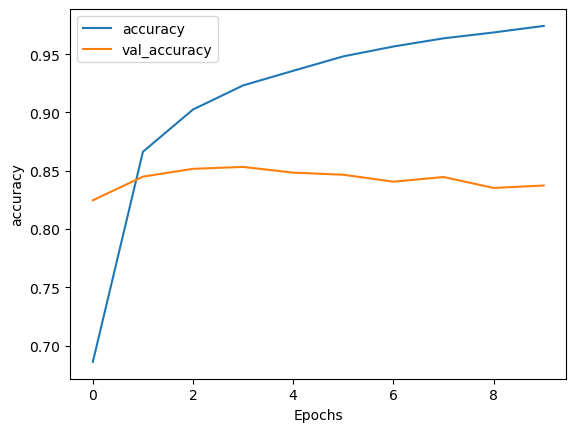

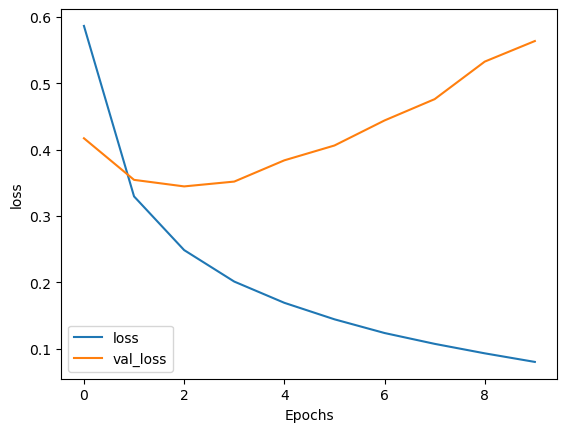

In [126]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Visualuze embeddings

In [128]:
reverse_word_index = tokenizer.index_word
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]

[Tensorflow Embedding Projector](https://projector.tensorflow.org/)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word_name = reverse_word_index[word_num]
  word_embedding = embedding_weights[word_num]
  out_m.write(word_name + "\n")
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

out_v.close()
out_m.close()

---

## Subwords

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

C:\Users\pk764\miniconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Data

In [1]:
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [17]:
tokenizer_subwords = info_subwords.features['text'].encoder

for example in imdb_subwords['train'].take(1):
    print(example[0])
    print(tokenizer_subwords.decode(example[0]))

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this m

In [20]:
train_data = imdb_plaintext['train']
training_sentences = []

for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
print(training_sentences[0])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [8]:
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer_plaintext.fit_on_texts(training_sentences)
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

In [9]:
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [11]:
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)
original_string = tokenizer_subwords.decode(tokenized_string)
print (original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re